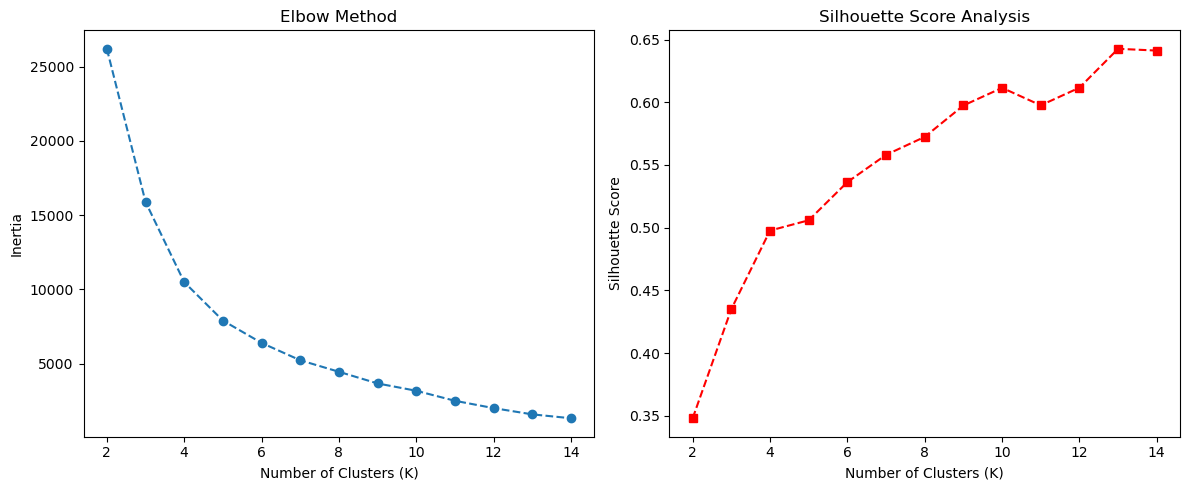

Optimal number of clusters: 13
Cluster
0     195
1      66
2      67
3      65
4      66
5      65
6      66
7      65
8      66
9      65
10     67
11     65
12     66
Name: count, dtype: int64


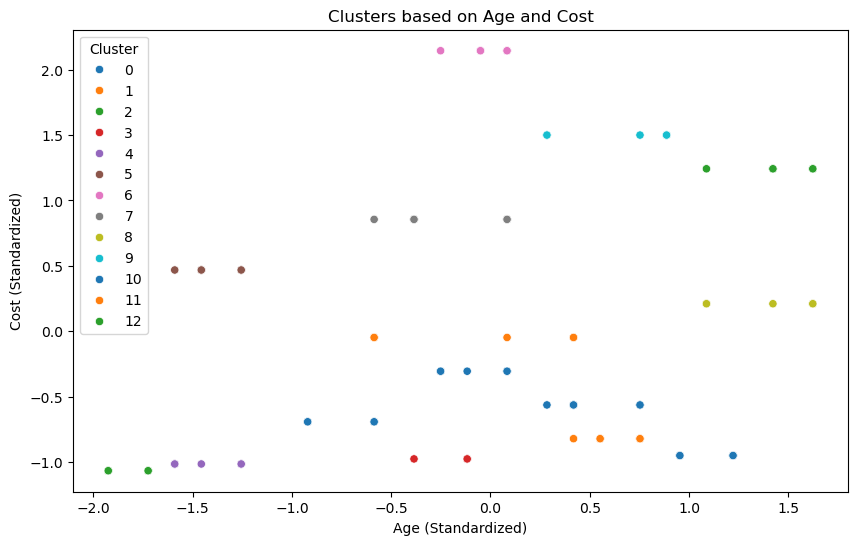

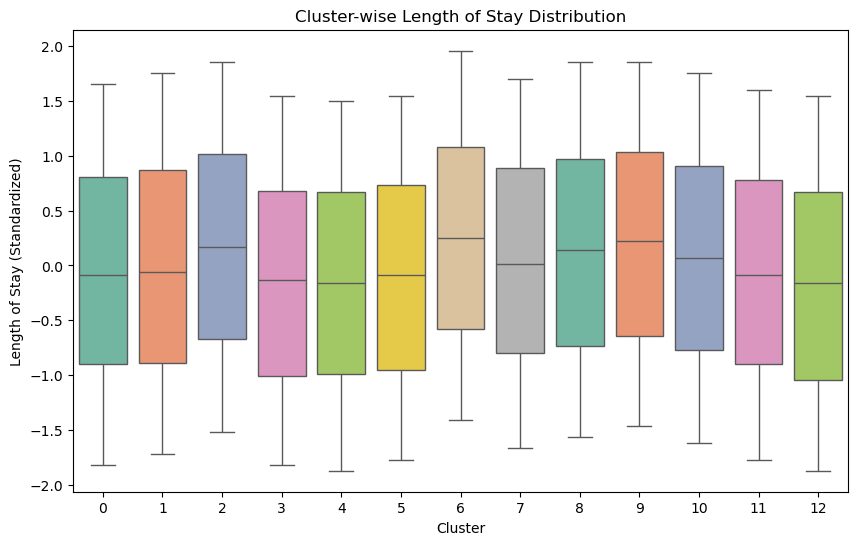

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
file_path = "data.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Encode categorical variables
categorical_cols = ["Gender", "Condition", "Procedure", "Readmission", "Outcome"]
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Normalize numerical features
numerical_cols = ["Age", "Cost", "Length_of_Stay", "Satisfaction"]
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Drop Patient_ID if it exists
df.drop(columns=["Patient_ID"], errors="ignore", inplace=True)

# Determine optimal K using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Plot Elbow Method and Silhouette Score
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.tight_layout()
plt.show()

# Select the best K based on silhouette score
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df)

# Display cluster distribution
print(df["Cluster"].value_counts().sort_index())

# Scatter plot for two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Age"], y=df["Cost"], hue=df["Cluster"], palette="tab10")
plt.xlabel("Age (Standardized)")
plt.ylabel("Cost (Standardized)")
plt.title("Clusters based on Age and Cost")
plt.legend(title="Cluster")
plt.show()

# Boxplot for cluster-wise Length of Stay
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Cluster"], y=df["Length_of_Stay"], hue=df["Cluster"], palette="Set2", legend=False)
plt.xlabel("Cluster")
plt.ylabel("Length of Stay (Standardized)")
plt.title("Cluster-wise Length of Stay Distribution")
plt.show()
